In [1]:
#import necessary packages
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

In [2]:
#read the data and replace the missing attribute values with 0
df = pd.read_csv('arrhythmia.data', index_col=None)
df.replace('?', np.nan, inplace=True) 
df = df.fillna(0)
df = df.iloc[:, :-1]
print(df)

     75  0  190  80   91  193  371  174  121  -16  ... -0.3.1 0.0.38   9.0  \
0    56  1  165  64   81  174  401  149   39   25  ...   -0.5    0.0   8.5   
1    54  0  172  95  138  163  386  185  102   96  ...    0.9    0.0   9.5   
2    55  0  175  94  100  202  380  179  143   28  ...    0.1    0.0  12.2   
3    75  0  190  80   88  181  360  177  103  -16  ...   -0.4    0.0  13.1   
4    13  0  169  51  100  167  321  174   91  107  ...    0.0   -0.6  12.2   
..   .. ..  ...  ..  ...  ...  ...  ...  ...  ...  ...    ...    ...   ...   
446  53  1  160  70   80  199  382  154  117  -37  ...    0.0    0.0   4.3   
447  37  0  190  85  100  137  361  201   73   86  ...   -0.5    0.0  15.6   
448  36  0  166  68  108  176  365  194  116  -85  ...    1.2    0.0  16.3   
449  32  1  155  55   93  106  386  218   63   54  ...    0.2   -0.4  12.0   
450  78  1  160  70   79  127  364  138   78   28  ...   -0.3    0.0  10.4   

     -0.9 0.0.39  0.0.40  0.9.2  2.9.1  23.3  49.4  
0     0.0 

In [3]:
# create the attribute information from the arrhythmia.name file to make the dataset complete.
attribute_info = {
    1: ('Age', 'linear'),
    2: ('Sex', 'nominal'),
    3: ('Height', 'linear'),
    4: ('weight', 'linear'),
    5: ('QRS duration', 'linear'),
    6: ('P-R interval', 'linear'),
    7: ('Q-T interval', 'linear'),
    8: ('T interval', 'linear'),
    9: ('P interval', 'linear'),
    10: ('Vector angles in degrees on fromt plane of QRS', 'linear'),
    11: ('Vector angles in degrees on fromt plane of T', 'linear'),
    12: ('Vector angles in degrees on fromt plane of P', 'linear'),
    13: ('Vector angles in degrees on fromt plane of QRST', 'linear'),
    14: ('Vector angles in degrees on fromt plane of J', 'linear'),
    15: ('Heart rate', 'linear'),
    16: ('Average width of Q wave of channel DI ', 'linear'),
    17: ('Average width of R wave of channel DI ', 'linear'),
    18: ('Average width of S wave of channel DI ', 'linear'),
    19: ('Average width of R1 wave of channel DI ', 'linear'),
    20: ('Average width of S1 wave of channel DI ', 'linear'),
    21: ('number of intrinsic deflections of channel DI', 'linear'),
    22: ('existence of ragged R wave of channel DI', 'nominal'),
    23: ('existence of diphasic derivation of R wave of channel DI', 'nominal'),
    24: ('existence of ragged P wave of channel DI', 'nominal'),
    25: ('existence of diphasic derivation of P wave of channel DI', 'nominal'),
    26: ('existence of ragged T wave of channel DI', 'nominal'),
    27: ('existence of diphasic derivation of T wave of channel DI', 'nominal'),
    28: ('Average width of Q wave of channel DII ', 'linear'),
    29: ('Average width of R wave of channel DII ', 'linear'),
    30: ('Average width of S wave of channel DII ', 'linear'),
    31: ('Average width of R1 wave of channel DII ', 'linear'),
    32: ('Average width of S1 wave of channel DII ', 'linear'),
    33: ('number of intrinsic deflections of channel DII', 'linear'),
    34: ('existence of ragged R wave of channel DII', 'nominal'),
    35: ('existence of diphasic derivation of R wave of channel DII', 'nominal'),
    36: ('existence of ragged P wave of channel DII', 'nominal'),
    37: ('existence of diphasic derivation of P wave of channel DII', 'nominal'),
    38: ('existence of ragged T wave of channel DII', 'nominal'),
    39: ('existence of diphasic derivation of T wave of channel DII', 'nominal'),
    40: ('Average width of Q wave of channel DIII ', 'linear'),
    41: ('Average width of R wave of channel DIII ', 'linear'),
    42: ('Average width of S wave of channel DIII ', 'linear'),
    43: ('Average width of R1 wave of channel DIII ', 'linear'),
    44: ('Average width of S1 wave of channel DIII ', 'linear'),
    45: ('number of intrinsic deflections of channel DIII', 'linear'),
    46: ('existence of ragged R wave of channel DIII', 'nominal'),
    47: ('existence of diphasic derivation of R wave of channel DIII', 'nominal'),
    48: ('existence of ragged P wave of channel DIII', 'nominal'),
    49: ('existence of diphasic derivation of P wave of channel DIII', 'nominal'),
    50: ('existence of ragged T wave of channel DIII', 'nominal'),
    51: ('existence of diphasic derivation of T wave of channel DIII', 'nominal'),
    52: ('Average width of Q wave of channel AVR ', 'linear'),
    53: ('Average width of R wave of channel AVR ', 'linear'),
    54: ('Average width of S wave of channel AVR ', 'linear'),
    55: ('Average width of R1 wave of channel AVR ', 'linear'),
    56: ('Average width of S1 wave of channel AVR ', 'linear'),
    57: ('number of intrinsic deflections of channel AVR', 'linear'),
    58: ('existence of ragged R wave of channel AVR', 'nominal'),
    59: ('existence of diphasic derivation of R wave of channel AVR', 'nominal'),
    60: ('existence of ragged P wave of channel AVR', 'nominal'),
    61: ('existence of diphasic derivation of P wave of channel AVR', 'nominal'),
    62: ('existence of ragged T wave of channel AVR', 'nominal'),
    63: ('existence of diphasic derivation of T wave of channel AVR', 'nominal'),
    64: ('Average width of Q wave of channel AVL ', 'linear'),
    65: ('Average width of R wave of channel AVL ', 'linear'),
    66: ('Average width of S wave of channel AVL ', 'linear'),
    67: ('Average width of R1 wave of channel AVL ', 'linear'),
    68: ('Average width of S1 wave of channel AVL ', 'linear'),
    69: ('number of intrinsic deflections of channel AVL', 'linear'),
    70: ('existence of ragged R wave of channel AVL', 'nominal'),
    71: ('existence of diphasic derivation of R wave of channel AVL', 'nominal'),
    72: ('existence of ragged P wave of channel AVL', 'nominal'),
    73: ('existence of diphasic derivation of P wave of channel AVL', 'nominal'),
    74: ('existence of ragged T wave of channel AVL', 'nominal'),
    75: ('existence of diphasic derivation of T wave of channel AVL', 'nominal'),
    76: ('Average width of Q wave of channel AVF ', 'linear'),
    77: ('Average width of R wave of channel AVF ', 'linear'),
    78: ('Average width of S wave of channel AVF ', 'linear'),
    79: ('Average width of R1 wave of channel AVF ', 'linear'),
    80: ('Average width of S1 wave of channel AVF ', 'linear'),
    81: ('number of intrinsic deflections of channel AVF', 'linear'),
    82: ('existence of ragged R wave of channel AVF', 'nominal'),
    83: ('existence of diphasic derivation of R wave of channel AVF', 'nominal'),
    84: ('existence of ragged P wave of channel AVF', 'nominal'),
    85: ('existence of diphasic derivation of P wave of channel AVF', 'nominal'),
    86: ('existence of ragged T wave of channel AVF', 'nominal'),
    87: ('existence of diphasic derivation of T wave of channel AVF', 'nominal'),
    88: ('Average width of Q wave of channel V1 ', 'linear'),
    89: ('Average width of R wave of channel V1 ', 'linear'),
    90: ('Average width of S wave of channel V1 ', 'linear'),
    91: ('Average width of R1 wave of channel V1 ', 'linear'),
    92: ('Average width of S1 wave of channel V1 ', 'linear'),
    93: ('number of intrinsic deflections of channel V1', 'linear'),
    94: ('existence of ragged R wave of channel V1', 'nominal'),
    95: ('existence of diphasic derivation of R wave of channel V1', 'nominal'),
    96: ('existence of ragged P wave of channel V1', 'nominal'),
    97: ('existence of diphasic derivation of P wave of channel V1', 'nominal'),
    98: ('existence of ragged T wave of channel V1', 'nominal'),
    99: ('existence of diphasic derivation of T wave of channel V1', 'nominal'),
    100: ('Average width of Q wave of channel V2 ', 'linear'),
    101: ('Average width of R wave of channel V2 ', 'linear'),
    102: ('Average width of S wave of channel V2 ', 'linear'),
    103: ('Average width of R1 wave of channel V2 ', 'linear'),
    104: ('Average width of S1 wave of channel V2 ', 'linear'),
    105: ('number of intrinsic deflections of channel V2', 'linear'),
    106: ('existence of ragged R wave of channel V2', 'nominal'),
    107: ('existence of diphasic derivation of R wave of channel V2', 'nominal'),
    108: ('existence of ragged P wave of channel V2', 'nominal'),
    109: ('existence of diphasic derivation of P wave of channel V2', 'nominal'),
    110: ('existence of ragged T wave of channel V2', 'nominal'),
    111: ('existence of diphasic derivation of T wave of channel V2', 'nominal'),
    112: ('Average width of Q wave of channel V3 ', 'linear'),
    113: ('Average width of R wave of channel V3 ', 'linear'),
    114: ('Average width of S wave of channel V3 ', 'linear'),
    115: ('Average width of R1 wave of channel V3 ', 'linear'),
    116: ('Average width of S1 wave of channel V3 ', 'linear'),
    117: ('number of intrinsic deflections of channel V3', 'linear'),
    118: ('existence of ragged R wave of channel V3', 'nominal'),
    119: ('existence of diphasic derivation of R wave of channel V3', 'nominal'),
    120: ('existence of ragged P wave of channel V3', 'nominal'),
    121: ('existence of diphasic derivation of P wave of channel V3', 'nominal'),
    122: ('existence of ragged T wave of channel V3', 'nominal'),
    123: ('existence of diphasic derivation of T wave of channel V3', 'nominal'),
    124: ('Average width of Q wave of channel V4 ', 'linear'),
    125: ('Average width of R wave of channel V4 ', 'linear'),
    126: ('Average width of S wave of channel V4 ', 'linear'),
    127: ('Average width of R1 wave of channel V4 ', 'linear'),
    128: ('Average width of S1 wave of channel V4 ', 'linear'),
    129: ('number of intrinsic deflections of channel V4', 'linear'),
    130: ('existence of ragged R wave of channel V4', 'nominal'),
    131: ('existence of diphasic derivation of R wave of channel V4', 'nominal'),
    132: ('existence of ragged P wave of channel V4', 'nominal'),
    133: ('existence of diphasic derivation of P wave of channel V4', 'nominal'),
    134: ('existence of ragged T wave of channel V4', 'nominal'),
    135: ('existence of diphasic derivation of T wave of channel V4', 'nominal'),
    136: ('Average width of Q wave of channel V5 ', 'linear'),
    137: ('Average width of R wave of channel V5 ', 'linear'),
    138: ('Average width of S wave of channel V5 ', 'linear'),
    139: ('Average width of R1 wave of channel V5 ', 'linear'),
    140: ('Average width of S1 wave of channel V5 ', 'linear'),
    141: ('number of intrinsic deflections of channel V5', 'linear'),
    142: ('existence of ragged R wave of channel V5', 'nominal'),
    143: ('existence of diphasic derivation of R wave of channel V5', 'nominal'),
    144: ('existence of ragged P wave of channel V5', 'nominal'),
    145: ('existence of diphasic derivation of P wave of channel V5', 'nominal'),
    146: ('existence of ragged T wave of channel V5', 'nominal'),
    147: ('existence of diphasic derivation of T wave of channel V5', 'nominal'),
    148: ('Average width of Q wave of channel V6 ', 'linear'),
    149: ('Average width of R wave of channel V6 ', 'linear'),
    150: ('Average width of S wave of channel V6 ', 'linear'),
    151: ('Average width of R1 wave of channel V6 ', 'linear'),
    152: ('Average width of S1 wave of channel V6 ', 'linear'),
    153: ('number of intrinsic deflections of channel V6', 'linear'),
    154: ('existence of ragged R wave of channel V6', 'nominal'),
    155: ('existence of diphasic derivation of R wave of channel V6', 'nominal'),
    156: ('existence of ragged P wave of channel V6', 'nominal'),
    157: ('existence of diphasic derivation of P wave of channel V6', 'nominal'),
    158: ('existence of ragged T wave of channel V6', 'nominal'),
    159: ('existence of diphasic derivation of T wave of channel V6', 'nominal'),
    160: ('amplitude of JJ wave of channel DI', 'linear'),
    161: ('amplitude of Q wave of channel DI', 'linear'),
    162: ('amplitude of R wave of channel DI', 'linear'),
    163: ('amplitude of S wave of channel DI', 'linear'),
    164: ('amplitude of R1 wave of channel DI', 'linear'),
    165: ('amplitude of S1 wave of channel DI', 'linear'),
    166: ('amplitude of P wave of channel DI', 'linear'),
    167: ('amplitude of T wave of channel DI', 'linear'),
    168: ('QRSA of channel DI', 'linear'),
    169: ('QRSTA of channel DI', 'linear'),
    170: ('amplitude of JJ wave of channel DII', 'linear'),
    171: ('amplitude of Q wave of channel DII', 'linear'),
    172: ('amplitude of R wave of channel DII', 'linear'),
    173: ('amplitude of S wave of channel DII', 'linear'),
    174: ('amplitude of R1 wave of channel DII', 'linear'),
    175: ('amplitude of S1 wave of channel DII', 'linear'),
    176: ('amplitude of P wave of channel DII', 'linear'),
    177: ('amplitude of T wave of channel DII', 'linear'),
    178: ('QRSA of channel DII', 'linear'),
    179: ('QRSTA of channel DII', 'linear'),
    180: ('amplitude of JJ wave of channel DIII', 'linear'),
    181: ('amplitude of Q wave of channel DIII', 'linear'),
    182: ('amplitude of R wave of channel DIII', 'linear'),
    183: ('amplitude of S wave of channel DIII', 'linear'),
    184: ('amplitude of R1 wave of channel DIII', 'linear'),
    185: ('amplitude of S1 wave of channel DIII', 'linear'),
    186: ('amplitude of P wave of channel DIII', 'linear'),
    187: ('amplitude of T wave of channel DIII', 'linear'),
    188: ('QRSA of channel DIII', 'linear'),
    189: ('QRSTA of channel DIII', 'linear'),
    190: ('amplitude of JJ wave of channel AVR', 'linear'),
    191: ('amplitude of Q wave of channel AVR', 'linear'),
    192: ('amplitude of R wave of channel AVR', 'linear'),
    193: ('amplitude of S wave of channel AVR', 'linear'),
    194: ('amplitude of R1 wave of channel AVR', 'linear'),
    195: ('amplitude of S1 wave of channel AVR', 'linear'),
    196: ('amplitude of P wave of channel AVR', 'linear'),
    197: ('amplitude of T wave of channel AVR', 'linear'),
    198: ('QRSA of channel AVR', 'linear'),
    199: ('QRSTA of channel AVR', 'linear'),
    200: ('amplitude of JJ wave of channel AVL', 'linear'),
    201: ('amplitude of Q wave of channel AVL', 'linear'),
    202: ('amplitude of R wave of channel AVL', 'linear'),
    203: ('amplitude of S wave of channel AVL', 'linear'),
    204: ('amplitude of R1 wave of channel AVL', 'linear'),
    205: ('amplitude of S1 wave of channel AVL', 'linear'),
    206: ('amplitude of P wave of channel AVL', 'linear'),
    207: ('amplitude of T wave of channel AVL', 'linear'),
    208: ('QRSA of channel AVL', 'linear'),
    209: ('QRSTA of channel AVL', 'linear'),
    210: ('amplitude of JJ wave of channel AVF', 'linear'),
    211: ('amplitude of Q wave of channel AVF', 'linear'),
    212: ('amplitude of R wave of channel AVF', 'linear'),
    213: ('amplitude of S wave of channel AVF', 'linear'),
    214: ('amplitude of R1 wave of channel AVF', 'linear'),
    215: ('amplitude of S1 wave of channel AVF', 'linear'),
    216: ('amplitude of P wave of channel AVF', 'linear'),
    217: ('amplitude of T wave of channel AVF', 'linear'),
    218: ('QRSA of channel AVF', 'linear'),
    219: ('QRSTA of channel AVF', 'linear'),
    220: ('amplitude of JJ wave of channel V1', 'linear'),
    221: ('amplitude of Q wave of channel V1', 'linear'),
    222: ('amplitude of R wave of channel V1', 'linear'),
    223: ('amplitude of S wave of channel V1', 'linear'),
    224: ('amplitude of R1 wave of channel V1', 'linear'),
    225: ('amplitude of S1 wave of channel V1', 'linear'),
    226: ('amplitude of P wave of channel V1', 'linear'),
    227: ('amplitude of T wave of channel V1', 'linear'),
    228: ('QRSA of channel V1', 'linear'),
    229: ('QRSTA of channel V1', 'linear'),
    230: ('amplitude of JJ wave of channel V2', 'linear'),
    231: ('amplitude of Q wave of channel V2', 'linear'),
    232: ('amplitude of R wave of channel V2', 'linear'),
    233: ('amplitude of S wave of channel V2', 'linear'),
    234: ('amplitude of R1 wave of channel V2', 'linear'),
    235: ('amplitude of S1 wave of channel V2', 'linear'),
    236: ('amplitude of P wave of channel V2', 'linear'),
    237: ('amplitude of T wave of channel V2', 'linear'),
    238: ('QRSA of channel V2', 'linear'),
    239: ('QRSTA of channel V2', 'linear'),
    240: ('amplitude of JJ wave of channel V3', 'linear'),
    241: ('amplitude of Q wave of channel V3', 'linear'),
    242: ('amplitude of R wave of channel V3', 'linear'),
    243: ('amplitude of S wave of channel V3', 'linear'),
    244: ('amplitude of R1 wave of channel V3', 'linear'),
    245: ('amplitude of S1 wave of channel V3', 'linear'),
    246: ('amplitude of P wave of channel V3', 'linear'),
    247: ('amplitude of T wave of channel V3', 'linear'),
    248: ('QRSA of channel V3', 'linear'),
    249: ('QRSTA of channel V3', 'linear'),
    250: ('amplitude of JJ wave of channel V4', 'linear'),
    251: ('amplitude of Q wave of channel V4', 'linear'),
    252: ('amplitude of R wave of channel V4', 'linear'),
    253: ('amplitude of S wave of channel V4', 'linear'),
    254: ('amplitude of R1 wave of channel V4', 'linear'),
    255: ('amplitude of S1 wave of channel V4', 'linear'),
    256: ('amplitude of P wave of channel V4', 'linear'),
    257: ('amplitude of T wave of channel V4', 'linear'),
    258: ('QRSA of channel V4', 'linear'),
    259: ('QRSTA of channel V4', 'linear'),
    260: ('amplitude of JJ wave of channel V5', 'linear'),
    261: ('amplitude of Q wave of channel V5', 'linear'),
    262: ('amplitude of R wave of channel V5', 'linear'),
    263: ('amplitude of S wave of channel V5', 'linear'),
    264: ('amplitude of R1 wave of channel V5', 'linear'),
    265: ('amplitude of S1 wave of channel V5', 'linear'),
    266: ('amplitude of P wave of channel V5', 'linear'),
    267: ('amplitude of T wave of channel V5', 'linear'),
    268: ('QRSA of channel V5', 'linear'),
    269: ('QRSTA of channel V5', 'linear'),
    270: ('amplitude of JJ wave of channel V6', 'linear'),
    271: ('amplitude of Q wave of channel V6', 'linear'),
    272: ('amplitude of R wave of channel V6', 'linear'),
    273: ('amplitude of S wave of channel V6', 'linear'),
    274: ('amplitude of R1 wave of channel V6', 'linear'),
    275: ('amplitude of S1 wave of channel V6', 'linear'),
    276: ('amplitude of P wave of channel V6', 'linear'),
    277: ('amplitude of T wave of channel V6', 'linear'),
    278: ('QRSA of channel V6', 'linear'),
    279: ('QRSTA of channel V5', 'linear')}
    
    

In [4]:
#assign the names to columns
df.columns = [f"{attribute_name} ({attribute_type})" for attribute_name, attribute_type in attribute_info.values()]

In [5]:
print(df)

     Age (linear)  Sex (nominal)  Height (linear)  weight (linear)  \
0              56              1              165               64   
1              54              0              172               95   
2              55              0              175               94   
3              75              0              190               80   
4              13              0              169               51   
..            ...            ...              ...              ...   
446            53              1              160               70   
447            37              0              190               85   
448            36              0              166               68   
449            32              1              155               55   
450            78              1              160               70   

     QRS duration (linear)  P-R interval (linear)  Q-T interval (linear)  \
0                       81                    174                    401   
1      

In [6]:
#scale and normalize the dataset
scaler = StandardScaler()
scaler.fit(df)
X_scaled = scaler.transform(df)
X_scaled_norm = preprocessing.normalize(X_scaled)

In [7]:
# using the elbow plot to determine the optimal k value.
sse = []
k_values = range(1, 40) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled_norm)
    sse.append(kmeans.inertia_)

In [ ]:
'''
The elbow method shows the sum of the squared errors (SSE) vs the number of clusters (k). 
When K value decreases, the SSE value also decrease. Theoratically, before the optimal k value, the SSE decreases steeply.
And at the optimal k value, the rate of decrease becomes smaller, which will form an elbow. 
After this point, the increase of k won't significantly reduce the SSE any more. 
In the below elbow plot, the point at which this elbow occurs is around k=6.
'''

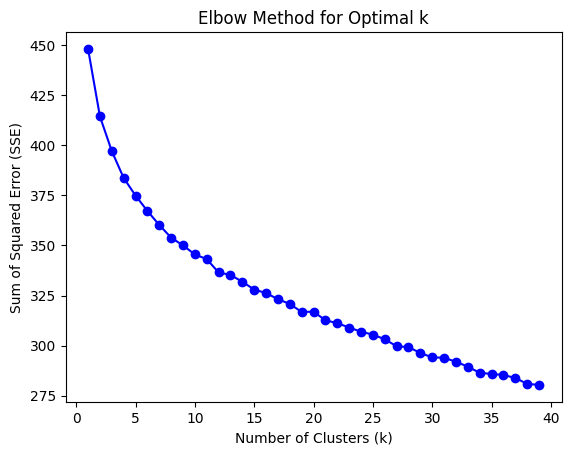

In [8]:
plt.plot(k_values, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [26]:
optimal_k = 6

# Apply k-means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled_norm)


In [27]:
# since there are nearly 300 features in this dataset, to plot the clusters, the dimensional reduction could be done.
# Since we're using the 2D x vs  y plot, I reduced the componets to 2.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_norm)
X_pca.shape
centroids_pca = pca.transform(kmeans.cluster_centers_)

In [ ]:
'''
After the clusters have been generated using the K-mean method and PCA is used to reduce the dimensionality of the data
to 2 component, the clustered original data is transformed using the PCA model for later 2D visualization.
Importantly, as the center of the cluster, the centroid data also need to be reduced using PCA for the accurate visualization.
Otherwise the position of the centroid will be wrong.
Finally, using the plot function, plot the clusters and the centroids after PCA reduction, distributed by the two principle components.
In total 6 clusters can be observed, with 6 red X indicating the centroid of each clusters.
'''

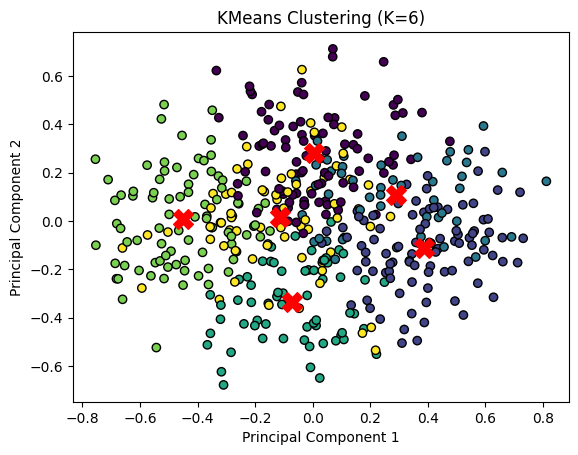

In [28]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200)
plt.title(f'KMeans Clustering (K={optimal_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()